### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

## Check number of rows and columns

In [ ]:
df.shape

(1000, 9)

## Check all columns in the dataframe

In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

## Access the first five rows

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# **1. Data Cleaning**

## Check the missing values in the dataframe

In [ ]:
df.isna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


## Check the missing values count in the dataframe

In [ ]:
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


## Check for duplicate rows

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


## Check the count of duplicate rows in dataframe

In [ ]:
df.duplicated().sum()

0

## Check datatype of columns

In [ ]:
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


The datatype of date is datetime64[ns]


## Check for the outliers in the numerical_columns

In [ ]:
numerical_columns = ['Age','Quantity','Price per Unit']
df[numerical_columns].describe()

,Age,Quantity,Price per Unit
count,1000.00000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000
std,13.68143,1.132734,189.681356
min,18.00000,1.000000,25.000000
25%,29.00000,1.000000,30.000000
50%,42.00000,3.000000,50.000000
75%,53.00000,4.000000,300.000000
max,64.00000,4.000000,500.000000


# **2. Descriptive Statistics**

# Dataframe description

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# **3. Time Series Analysis**

# Rearranging the columns for more readability

In [ ]:
col_order = ['Customer ID', 'Transaction ID', 'Date', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']
df = df[col_order]

# Access the initial data

In [ ]:
df.head()

,Customer ID,Transaction ID,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,CUST001,1,2023-11-24,Male,34,Beauty,3,50,150
1,CUST002,2,2023-02-27,Female,26,Clothing,2,500,1000
2,CUST003,3,2023-01-13,Male,50,Electronics,1,30,30
3,CUST004,4,2023-05-21,Male,37,Clothing,1,500,500
4,CUST005,5,2023-05-06,Male,30,Beauty,2,50,100


# Insert a new column called year_month

In [ ]:
values = df['Date'].map(lambda col : (col.year)*100 + col.month)
df.insert(loc = 2, column = 'year_month', value = values)
df

,Customer ID,Transaction ID,year_month,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,CUST001,1,202311,2023-11-24,Male,34,Beauty,3,50,150
1,CUST002,2,202302,2023-02-27,Female,26,Clothing,2,500,1000
2,CUST003,3,202301,2023-01-13,Male,50,Electronics,1,30,30
3,CUST004,4,202305,2023-05-21,Male,37,Clothing,1,500,500
4,CUST005,5,202305,2023-05-06,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...,...
995,CUST996,996,202305,2023-05-16,Male,62,Clothing,1,50,50
996,CUST997,997,202311,2023-11-17,Male,52,Beauty,3,30,90
997,CUST998,998,202310,2023-10-29,Female,23,Beauty,4,25,100
998,CUST999,999,202312,2023-12-05,Female,36,Electronics,3,50,150


# Analyze total sales per month

In [ ]:
sales_per_month = df.groupby('year_month')['Total Amount'].count()
sales_per_month.head(10)

,Total Amount
year_month,
202301,76
202302,85
202303,73
202304,86
202305,105
202306,77
202307,72
202308,94
202309,65


# Visualise total sales per month

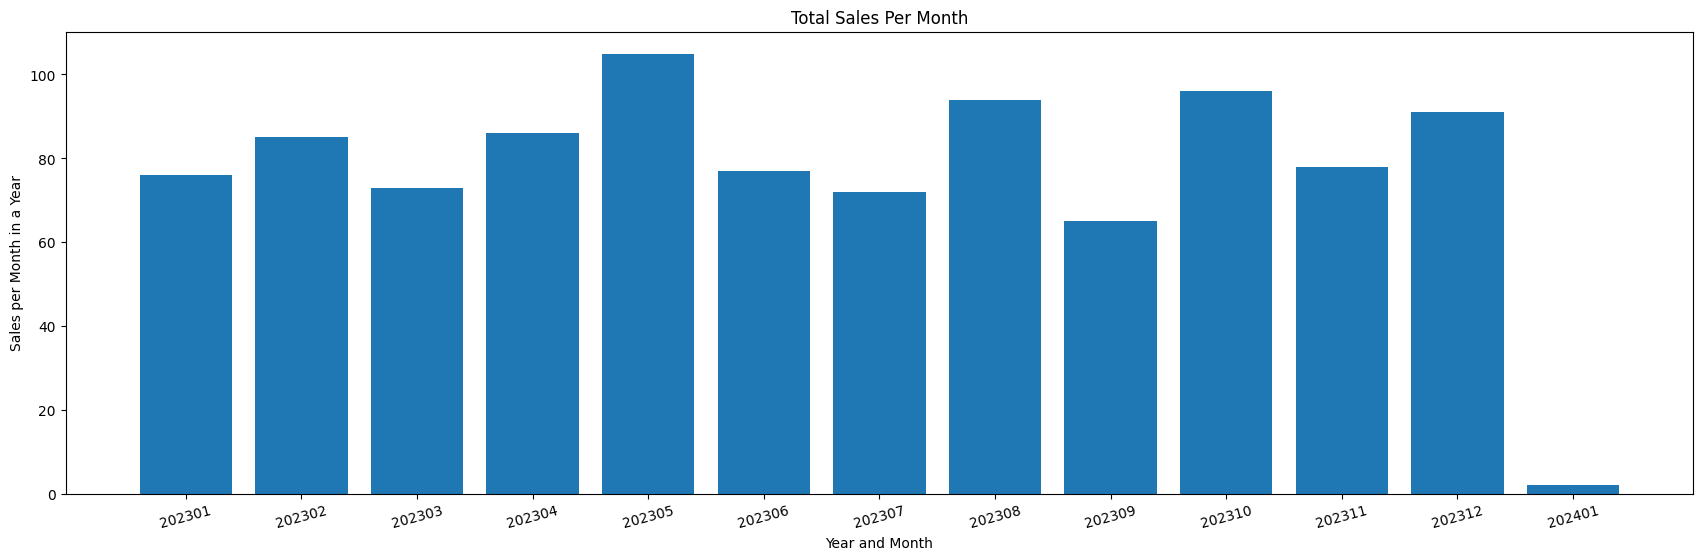

In [ ]:
plt.subplots(figsize = (21,6))

plt.xlabel('Year and Month')
plt.ylabel('Sales per Month in a Year')
plt.title('Total Sales Per Month')
plt.xticks(rotation = 15)

plt.bar(sales_per_month.index.astype('str'), sales_per_month.values)
plt.show()

Based on the analysis of total sales per month, May 2023 (202305) recorded the highest sales.

# **4. Customer and Product Analysis**

# Analyze purchasing behaviour according to customer's age

In [ ]:
age_pb = df.groupby('Age')['Total Amount'].count()
age_pb.head(10)

,Total Amount
Age,
18,21
19,21
20,21
21,20
22,27
23,24
24,15
25,20
26,22


# Visualise based on customer's age purchasing behaviour

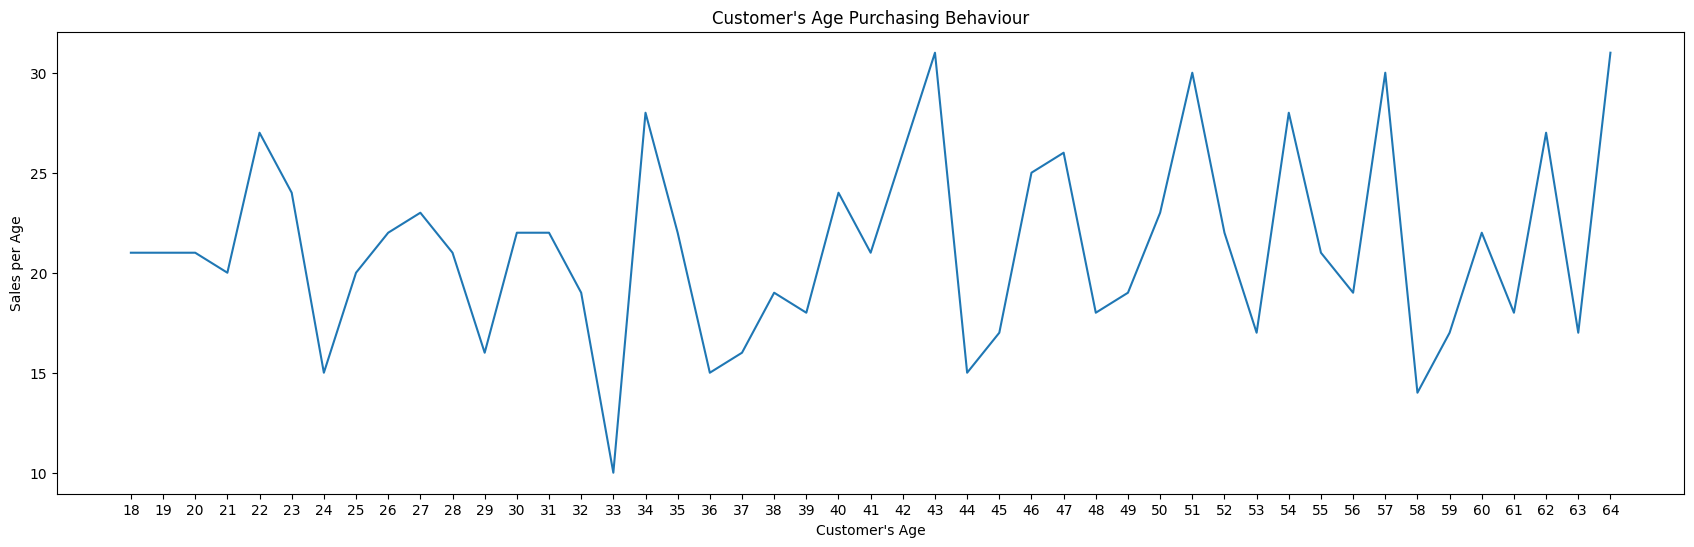

In [ ]:
plt.subplots(figsize = (21,6))

plt.xlabel("Customer's Age")
plt.ylabel('Sales per Age')
plt.title("Customer's Age Purchasing Behaviour")

plt.plot(age_pb.index.astype('str'), age_pb.values)
plt.show()

Based on the analysis of customer's age purchasing behaviour, age 43 recorded the highest number of sales.


# Analyze purchasing behaviour according to customer's gender

In [ ]:
gender_pb = df.groupby('Gender')['Total Amount'].size()
gender_pb

,Total Amount
Gender,
Female,510
Male,490


# Visualise based on customer's gender purchasing behaviour

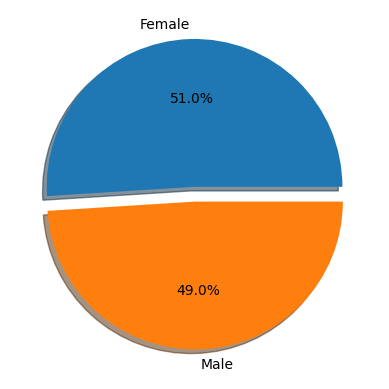

In [ ]:
Gender = ['Female', 'Male']
values = gender_pb.values

plt.pie(values, labels = Gender, shadow = True, explode = (0.05, 0.05), autopct = '%1.1f%%')
plt.show()

Based on the analysis of customer's gender purchasing behavior, Female customers accounted for 51.0% purchases, while Male customers made 49.0% purchases.

# **Purchasing Behavior Analysis**

# Analyze the most frequent purchased product by customers

In [ ]:
total_products = df.groupby('Product Category')['Quantity'].sum()
total_products

,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


# Visualise the total purchased products

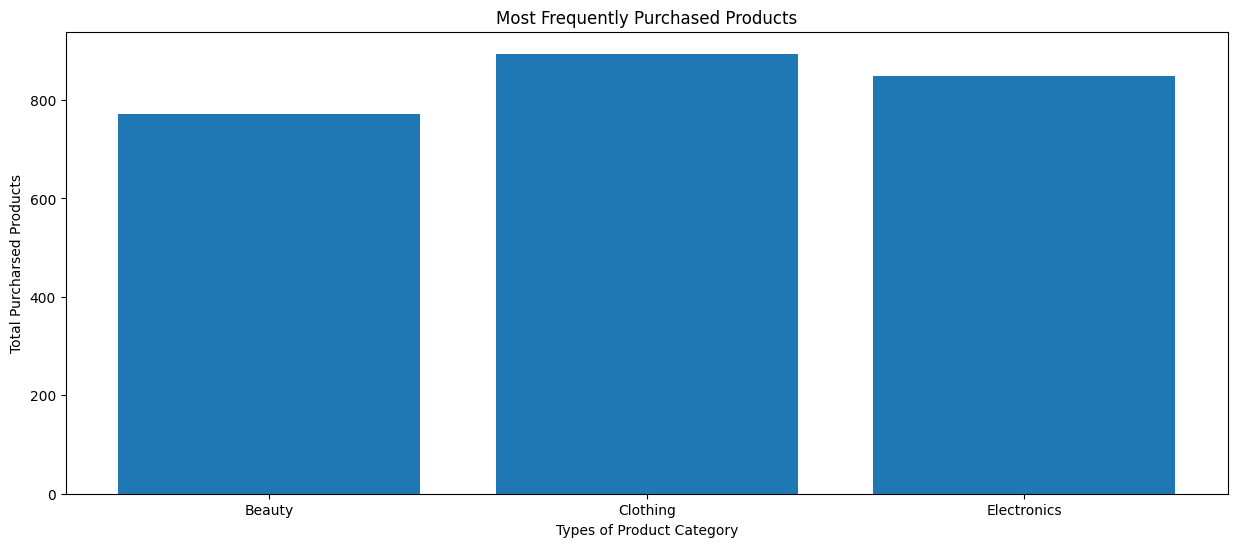

In [ ]:
plt.subplots(figsize = (15, 6))

plt.xlabel('Types of Product Category')
plt.ylabel('Total Purcharsed Products')
plt.title('Most Frequently Purchased Products')

plt.bar(total_products.index, total_products.values)
plt.show()

Based on the analysis of most purchased products, the Clothing types of product category recorded the highest number of purchases.

# Check the correlation between numerical variables in the dataframe

In [ ]:
numerical_columns = ['Age','Quantity','Price per Unit']

correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,Age,Quantity,Price per Unit
Age,1.000000,-0.023737,-0.038423
Quantity,-0.023737,1.000000,0.017501
Price per Unit,-0.038423,0.017501,1.000000


# Visualize the correlation between numerical variables

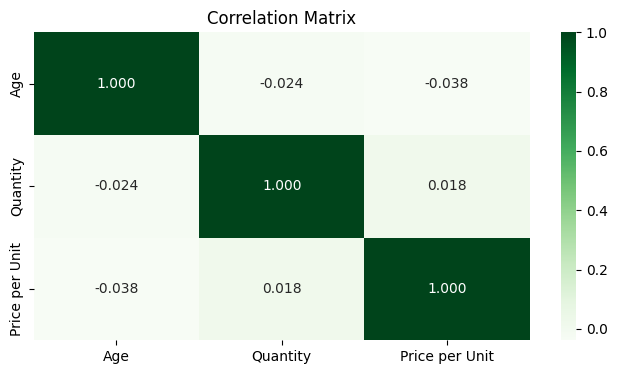

In [ ]:
plt.subplots(figsize = (8, 4))

plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot = True, cmap = "Greens", fmt = '.3f')
plt.show()

# **5. Actionable Recommendations**





### **1) Targeting High-Performing Age Groups**
**Observation**: Customers aged 37 or 26 may contribute the most revenue based on their transaction volumes.  
**Action**:  
- Design personalized discounts for customers in these age groups, such as birthday rewards or loyalty bonuses.  
- Use age-based segmentation in marketing campaigns. For instance, promote clothing or cosmetics heavily to customers in these age brackets.



### **2) Gender-Based Marketing Campaigns**
**Observation**: Female customers are likely contributing significantly to sales in categories like "Beauty" and "Clothing".  
**Action**:  
- Launch female-focused promotions, such as “Ladies’ Day Discounts” or buy-one-get-one offers on beauty products and clothing.  
- Encourage referrals by offering additional discounts when female customers bring new buyers.



### **3) Prioritizing Top-Selling Product Categories**
**Observation**: Categories like Clothing, Electronics, and Beauty often dominate sales.  
**Action**:  
- Stock high-demand items in these categories during peak shopping seasons.  
- Use cross-selling strategies, e.g., "Buy electronics and get a discount on accessories" or “Pair beauty products with clothing for 10% off.”  
- Introduce bundle deals combining popular items, such as clothing and shoes.



### **4) Enhancing Customer Retention with Loyalty Rewards**
**Observation**: Repeat customers can drive significant revenue.  
**Action**:  
- Develop a points-based loyalty program where purchases in high-value categories earn extra rewards.  
- Send follow-up offers to customers within 7–14 days after a purchase to encourage repeat business.



### **5) Optimizing Pricing and Promotions**
**Observation**: Certain categories may have price-sensitive customers.  
**Action**:  
- Offer tiered discounts for bulk purchases (e.g., “Buy 2 and save 10%”).  
- Adjust pricing for slower-moving categories to clear inventory, pairing them with best-sellers.



### **6) Leveraging Time-Based Insights**
**Observation**: Sales patterns might vary by time of year.  
**Action**:  
- Introduce seasonal promotions like “Back-to-School Clothing Sale” or “Holiday Electronics Discounts.”  
- Analyze monthly sales trends to identify and capitalize on high-performing periods.



### **7) Encouraging Preferred Payment Methods**
**Observation**: If high-value transactions frequently use credit or debit cards:  
**Action**:  
- Partner with banks to offer cashback or discounts for card payments.  
- Encourage cash users with small loyalty perks to reduce transaction costs.
